In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = pd.read_excel("C:\\Users\\user\\Desktop\\machine\\data_1017.xlsx",sheet_name="Sheet1")


In [9]:
# def split_omr_data(df):
#     # 'ht_omr_data' 열의 값을 리스트로 변환 (한 글자씩)
#     omr_responses = df['ht_omr_data'].apply(lambda x: list(x[:375]))  # 375개의 문항까지만 자름
#     # 리스트를 각각의 문항으로 나누어 새로운 컬럼으로 변환
#     omr_df = pd.DataFrame(omr_responses.tolist(), columns=[f'Q{i+1}' for i in range(375)])
#     # 원래 df와 결합
#     df = pd.concat([df, omr_df], axis=1)
#     return df

# # 데이터 분리 실행
# df_split = split_omr_data(df)

# # 결과 확인
# print(df_split.head())
# df = df_split

   sex  sc_code  age                                        ht_omr_data  \
0    1        3   32  9011110110000010001001001000101010001001101010...   
1    1        1   39  1100010110000000001001101099100111011001101010...   
2    1        4   39  9110000110100000000001111000101010000000101110...   
3    2        3   34  0000010110000000001000000000101010001000000010...   
4    1        2   34  0000100111010000011000101000101010000001000100...   

  fixed_type  FG Q1 Q2 Q3 Q4  ... Q366 Q367 Q368 Q369 Q370 Q371 Q372 Q373  \
0          A   0  9  0  1  1  ...    0    0    0    0    0    1    0    0   
1          C   0  1  1  0  0  ...    0    0    1    0    0    1    0    0   
2          M   0  9  1  1  0  ...    0    0    1    0    0    1    0    0   
3          M   0  0  0  0  0  ...    0    1    1    0    0    1    0    1   
4          B   0  0  0  0  0  ...    1    0    1    0    0    1    0    0   

  Q374 Q375  
0    0    1  
1    1    1  
2    0    1  
3    0    1  
4    1    1  

[

In [46]:
df.head(6)

,sex,sc_code,age,ht_omr_data,fixed_type,FG,t1,t2,t3,t4,...,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27
0,1.0,3.0,32.0,9011110110000010001001001000101010001001101010...,A,0.0,48,55,57,54,...,68,44,62,37,49,53,51,46,39,61
1,1.0,1.0,39.0,1100010110000000001001101099100111011001101010...,C,0.0,61,56,61,60,...,26,42,41,30,39,43,54,44,57,41
2,1.0,4.0,39.0,9110000110100000000001111000101010000000101110...,M,0.0,46,36,51,52,...,44,43,55,47,44,44,48,45,43,65
3,2.0,3.0,34.0,0000010110000000001000000000101010001000000010...,M,0.0,46,54,46,61,...,34,44,41,36,46,44,40,46,41,57
4,1.0,2.0,34.0,0000100111010000011000101000101010000001000100...,B,0.0,37,39,46,50,...,61,42,45,46,42,43,42,44,41,41
5,2.0,3.0,27.0,0010100000000010000001001001101010001010011110...,M,1.0,41,20,49,47,...,45,44,55,35,66,44,60,47,57,59


In [4]:
label_encoder = LabelEncoder()

# 'fixed_type'을 숫자형으로 변환
df['fixed_type_encoded'] = label_encoder.fit_transform(df['fixed_type'])

print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'D1': 4, 'D2': 5, 'E': 6, 'M': 7, 'M1': 8, 'M2': 9, 'Ma': 10, 'Mb': 11, 'Mc': 12, 'R': 13, 'X': 14}


In [8]:
df = df.drop(['fixed_type','ht_omr_data','FG'], axis=1)
# df = df.drop(['FG'], axis=1)

In [9]:
df

,sex,sc_code,age,t1,t2,t3,t4,t5,t6,t7,...,t19,t20,t21,t22,t23,t24,t25,t26,t27,fixed_type_encoded
0,1,3,32,48,55,57,54,46,59,60,...,44,62,37,49,53,51,46,39,61,0
1,1,1,39,61,56,61,60,50,57,55,...,42,41,30,39,43,54,44,57,41,2
2,1,4,39,46,36,51,52,46,52,49,...,43,55,47,44,44,48,45,43,65,7
3,2,3,34,46,54,46,61,48,59,52,...,44,41,36,46,44,40,46,41,57,7
4,1,2,34,37,39,46,50,44,57,64,...,42,45,46,42,43,42,44,41,41,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,1,3,39,44,51,51,56,58,57,49,...,43,41,41,44,51,53,45,58,53,0
30867,1,1,29,43,53,43,49,43,46,45,...,52,80,60,55,60,45,57,47,38,7
30868,2,1,38,45,35,53,42,44,45,54,...,51,47,64,52,43,41,43,40,39,0
30869,2,1,18,43,51,50,44,51,52,49,...,45,41,40,50,42,50,46,42,45,0


In [10]:
df.dtypes

sex                   int64
sc_code               int64
age                   int64
t1                    int64
t2                    int64
t3                    int64
t4                    int64
t5                    int64
t6                    int64
t7                    int64
t8                    int64
t9                    int64
t10                   int64
t11                   int64
t12                   int64
t13                   int64
t14                   int64
t15                   int64
t16                   int64
t17                   int64
t18                   int64
t19                   int64
t20                   int64
t21                   int64
t22                   int64
t23                   int64
t24                   int64
t25                   int64
t26                   int64
t27                   int64
fixed_type_encoded    int32
dtype: object

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'D1': 4, 'D2': 5, 'E': 6, 'M': 7, 'M1': 8, 'M2': 9, 'Ma': 10, 'Mb': 11, 'Mc': 12, 'R': 13, 'X': 14}

Epoch 1/1500


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


761/772 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0562 - loss: 3.3845
Epoch 1: val_loss improved from inf to 2.99127, saving model to C:\Users\user\Desktop\DNN_eflow.weights.h5
772/772 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0563 - loss: 3.3841 - val_accuracy: 0.0959 - val_loss: 2.9913
Epoch 2/1500
755/772 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0731 - loss: 3.2850
Epoch 2: val_loss improved from 2.99127 to 2.92125, saving model to C:\Users\user\Desktop\DNN_eflow.weights.h5
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0732 - loss: 3.2844 - val_accuracy: 0.1325 - val_loss: 2.9213
Epoch 3/1500
771/772 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0861 - loss: 3.1807
Epoch 3: val_loss improved from 2.92125 to 2.84956, saving model to C:\Users\user\Desktop\DNN_eflow.weights.h5
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0861 - loss: 3.1806 - val_accuracy: 0.1849 - val_loss: 2.8496
Epoch 4/1500
760/772 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1

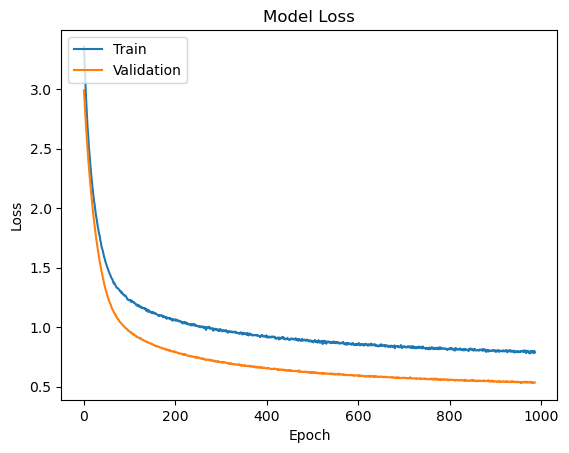

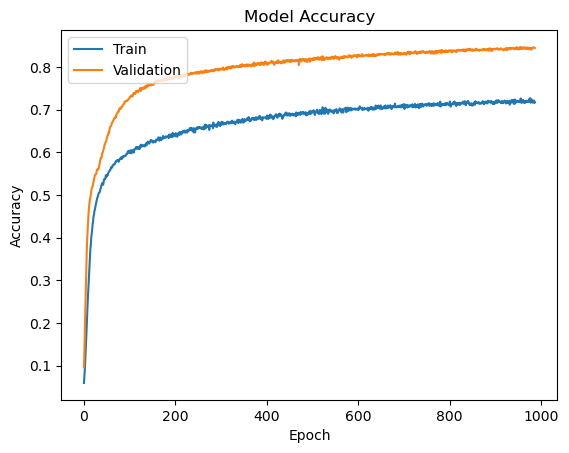

In [11]:
import numpy as np
import pandas as pd
from keras import layers
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from keras.layers import LeakyReLU

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from keras.layers import LeakyReLU, BatchNormalization
from keras.regularizers import l2

# Enable Mixed Precision (새로운 방식으로 설정)
from tensorflow.keras.mixed_precision import set_global_policy
set_global_policy('mixed_float16')

# 1. 데이터 로드 및 전처리
X = df.iloc[:, :-1]
y = df['fixed_type_encoded']  # 타겟 클래스
# X_scaled = scaler.fit_transform(X)

# # 결측값(9)을 NaN으로 대체하고 나중에 처리
# X.replace(9, np.nan, inplace=True)

# # 결측치를 열 별 최빈값으로 대체
# X.fillna(df.mode().iloc[0], inplace=True)

# 데이터가 모두 숫자인지 확인하고, 필요시 변환
X = X.astype(float)

# OneHot 인코딩으로 타겟을 인코딩 (다중 클래스 분류이므로 필요)
onehot = OneHotEncoder(sparse_output=False)  
y_encoded = onehot.fit_transform(y.values.reshape(-1, 1))

# 2. 훈련 데이터와 테스트 데이터로 분할
x_train, x_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 3. 딥러닝 모델 정의 (이후 코드는 동일)
# model = Sequential()
# model.add(layers.Dense(128, activation='leakyrelu', input_shape=(x_train.shape[1],), name='Hidden-1'))
# model.add(layers.Dropout(0.3))  # Dropout 규제
# model.add(layers.Dense(64, activation='leakyrelu', name='Hidden-2'))
# model.add(layers.Dropout(0.3))
# model.add(layers.Dense(32, activation='leakyrelu', name='Hidden-3'))
# model.add(layers.Dropout(0.3))  # Dropout 규제
# model.add(layers.Dense(y_train.shape[1], activation='softmax'))  # Output layer with 'softmax' for multi-class classification
model = Sequential()
#hidden1
model.add(layers.Dense(128, input_shape=(x_train.shape[1],), name='Hidden-1',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))  # LeakyReLU 활성화 함수 추가
model.add(layers.Dropout(0.3))  # Dropout 규제
#hidden2
model.add(layers.Dense(64, name='Hidden-2',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))  # LeakyReLU 활성화 함수 추가
model.add(layers.Dropout(0.3))
#hidden3
model.add(layers.Dense(32, name='Hidden-3',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))  # LeakyReLU 활성화 함수 추가
model.add(layers.Dropout(0.3))
#hidden4
model.add(layers.Dense(16, name='Hidden-4',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))  # LeakyReLU 활성화 함수 추가
model.add(layers.Dropout(0.3))
model.add(layers.Dense(y_train.shape[1], activation='softmax'))  # 다중 클래스 분류를 위한 softmax 출력층

# 4. 모델 컴파일 (이후 코드는 동일)
opt = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# 5. 콜백 설정 및 모델 학습
early_stop = EarlyStopping(monitor='val_loss', patience=30)
model_path = 'C:\\Users\\user\\Desktop\\DNN_eflow.weights.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                    epochs=1500, 
                    batch_size=32,
                    validation_data=(x_test, y_test), 
                    callbacks=[early_stop, checkpoint])

# 6. 학습 결과 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



In [12]:
model.load_weights(model_path)

193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.8453441295546559
F1 Score: 0.8379049780983641
Precision: 0.8375880083114229
Recall: 0.8453441295546559
Cohen's Kappa: 0.7895162992916983


c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


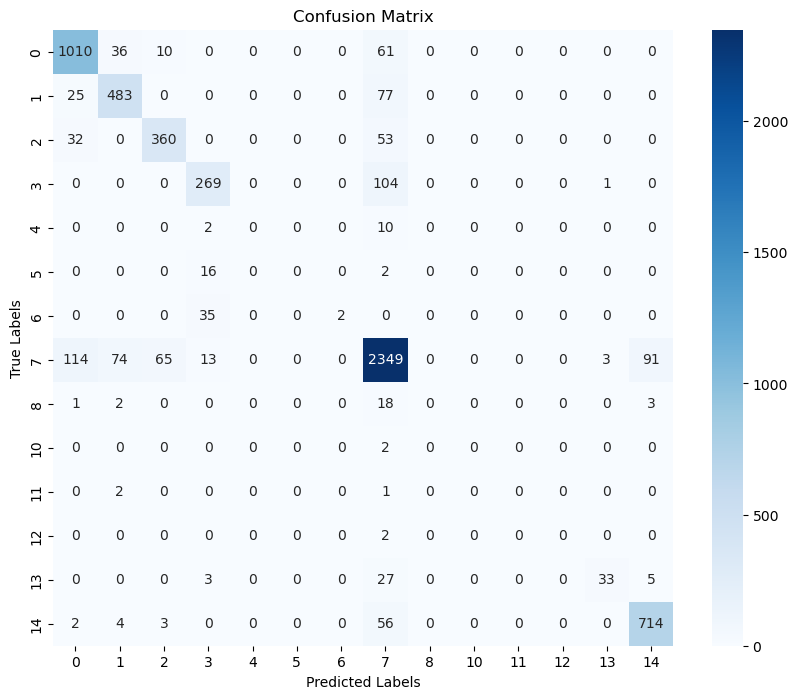

In [13]:
# 1. 예측값 계산 (학습)
predictions = model.predict(x_test)  # 각 클래스에 대한 확률 예측
actual = np.asarray(y_test)

# 예측값과 실제값 변환 (argmax로 가장 높은 확률의 클래스로 변환)
pred = [np.argmax(pred) for pred in predictions]  # 예측값
act = [np.argmax(a) for a in actual]  # 실제값

# DataFrame으로 변환
pred_df = pd.DataFrame(pred, columns=["예측값"])
actual_df = pd.DataFrame(act, columns=["실제값"])

# 2. 성능 지표 계산
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# 정확도
accuracy = accuracy_score(actual_df["실제값"], pred_df["예측값"])

# F1 스코어 (다중 클래스이므로 weighted 평균 사용)
f1 = f1_score(actual_df["실제값"], pred_df["예측값"], average='weighted')

# 정밀도 (Precision)
precision = precision_score(actual_df["실제값"], pred_df["예측값"], average='weighted')

# 재현율 (Recall)
recall = recall_score(actual_df["실제값"], pred_df["예측값"], average='weighted')

# 성능 결과 출력
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(actual_df["실제값"], pred_df["예측값"])
print(f"Cohen's Kappa: {kappa}")

# 3. 혼동 행렬 계산 및 시각화
conf_matrix = confusion_matrix(actual_df["실제값"], pred_df["예측값"])

# 혼동 행렬 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(act), yticklabels=np.unique(act))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 4. 결과 저장
pred_df.to_excel("C:\\Users\\user\\Desktop\\DNN_Pred.xlsx", index=False)
